## Setup

In [268]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## Load data

In [289]:
raw_df = pd.read_csv('data/ivy_wallet_data.csv', encoding='utf-16', skipinitialspace=True)
raw_df = raw_df.shift(1, axis="columns")
raw_df['Date'] = raw_df.index
raw_df = raw_df.reset_index(drop=True)
raw_df

,Date,Title,Category,Account,Amount,Currency,Type,Transfer Amount,Transfer Currency,To Account,...,ID,Account Color,Account orderNum,Category Color,Category orderNum,To Account Color,To Account orderNum,Account Icon,Category Icon,To Account Icon
0,21/11/2022 17:35,Fantastico,Groceries,Revolut,-86.50,BGN,EXPENSE,NaN,NaN,NaN,...,35a4ebb9-8a26-4519-9938-65960a06bc02,-13951130,0.0,-11678977.0,0.0,NaN,NaN,revolut,groceries,NaN
1,21/11/2022 12:34,Costa Coffee,Order food,Revolut,-42.38,BGN,EXPENSE,NaN,NaN,NaN,...,fa551cfc-bad1-4c31-b10d-b9976747976f,-13951130,0.0,-45581.0,1.0,NaN,NaN,revolut,orderfood2,NaN
2,21/11/2022 00:36,Ток,Bills,DSK,-33.30,BGN,EXPENSE,NaN,NaN,NaN,...,61018d03-0745-4cea-87f5-c2abdcf56e2f,-13670881,2.0,-864866.0,2.0,NaN,NaN,ic_vue_money_card,loan,NaN
3,20/11/2022 17:16,Fantastico,Groceries,Revolut,-120.70,BGN,EXPENSE,NaN,NaN,NaN,...,d1bc4e1c-3b25-4eaa-aa95-ec2f415c975c,-13951130,0.0,-11678977.0,0.0,NaN,NaN,revolut,groceries,NaN
4,20/11/2022 16:43,Harem Vitosha,Shisha (BAD!!),Cash,-73.00,BGN,EXPENSE,NaN,NaN,NaN,...,fc09e04e-3959-4931-8a02-572a555b67b5,-15414114,1.0,-1692114.0,11.0,NaN,NaN,ic_vue_money_wallet_empty,doctor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820,NaN,Наем,Bills,Cash,-650.00,BGN,EXPENSE,NaN,NaN,NaN,...,d14b2dc0-8d31-494f-888d-dcf794852ca8,-15414114,1.0,-864866.0,2.0,NaN,NaN,ic_vue_money_wallet_empty,loan,NaN
2821,NaN,Наем,Bills,Cash,-650.00,BGN,EXPENSE,NaN,NaN,NaN,...,8d7c816d-bd58-496f-a2fc-28fb1d60497b,-15414114,1.0,-864866.0,2.0,NaN,NaN,ic_vue_money_wallet_empty,loan,NaN
2822,NaN,Наем,Bills,Cash,-650.00,BGN,EXPENSE,NaN,NaN,NaN,...,f42f1971-08e9-4945-afd6-97b557822a8c,-15414114,1.0,-864866.0,2.0,NaN,NaN,ic_vue_money_wallet_empty,loan,NaN
2823,NaN,Наем,Bills,Cash,-650.00,BGN,EXPENSE,NaN,NaN,NaN,...,bd1d5f6f-00d0-4334-8bf9-aa89b19c5d01,-15414114,1.0,-864866.0,2.0,NaN,NaN,ic_vue_money_wallet_empty,loan,NaN


## Filter data

In [260]:
t1 = raw_df[raw_df['Date'].notnull()]
t2 = t1[t1['Amount'] <= 0]
t3 = t2[t2['Currency'] == 'BGN']

df = t3

df.describe()

,Amount,Transfer Amount,Receive Amount,Account Color,Account orderNum,Category Color,Category orderNum,To Account Color,To Account orderNum
count,2466.000000,159.000000,2466.000000,2.466000e+03,2466.000000,2.277000e+03,2277.000000,1.580000e+02,158.000000
mean,-67.802916,669.545912,110.377344,-1.404670e+07,0.673155,-4.325009e+06,7.689065,-1.383189e+07,0.968354
std,269.581947,605.061938,342.011070,1.581625e+06,1.271399,5.467883e+06,7.831481,2.538391e+06,2.297661
min,-5790.000000,10.000000,0.000000,-1.541411e+07,0.000000,-1.541411e+07,0.000000,-1.541411e+07,0.000000
25%,-43.712500,400.000000,18.372500,-1.395113e+07,0.000000,-9.744897e+06,1.000000,-1.541411e+07,0.000000
50%,-25.000000,500.000000,27.170000,-1.395113e+07,0.000000,-8.767520e+05,6.000000,-1.395113e+07,0.000000
75%,-14.965000,800.000000,51.000000,-1.395113e+07,1.000000,-4.558100e+04,11.000000,-1.395113e+07,1.000000
max,0.000000,4800.000000,5790.000000,-2.151000e+03,8.000000,-1.554000e+04,25.000000,-1.672379e+06,11.000000


### Transform

In [261]:
df['Date'] = pd.to_datetime(df['Date'].to_numpy(), dayfirst=True).date
df['Date'].tail()

/tmp/ipykernel_15459/1551706155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'].to_numpy(), dayfirst=True).date


2683    2021-05-11
2684    2021-05-11
2685    2021-05-11
2686    2021-05-11
2687    2021-05-11
Name: Date, dtype: object

In [262]:
dates = np.unique(df['Date'].to_numpy())
start = dates[0]
x = np.array([(date - start).days for date in dates])
print(x.shape)
x[0:10]

(547,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

count     547.000000
mean     -305.670914
std       606.310398
min     -6221.520000
25%      -253.145000
50%      -129.100000
75%       -83.465000
max        -5.450000
Name: Amount, dtype: float64
(547,)


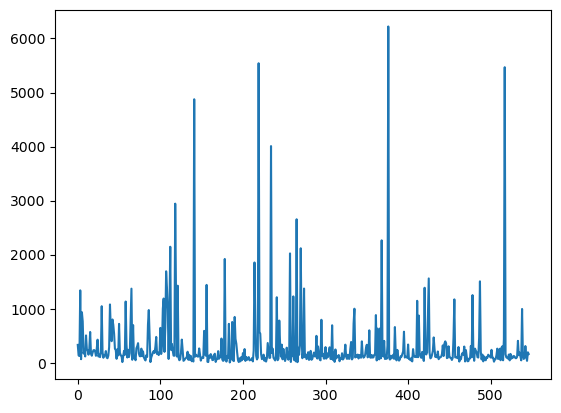

In [263]:
expenseByDates = df.groupby('Date')['Amount'].agg('sum').sort_index()
print(expenseByDates.describe())
y = np.multiply(expenseByDates.to_numpy(), -1)
print(y.shape)
plt.plot(y)

## Normalize Data

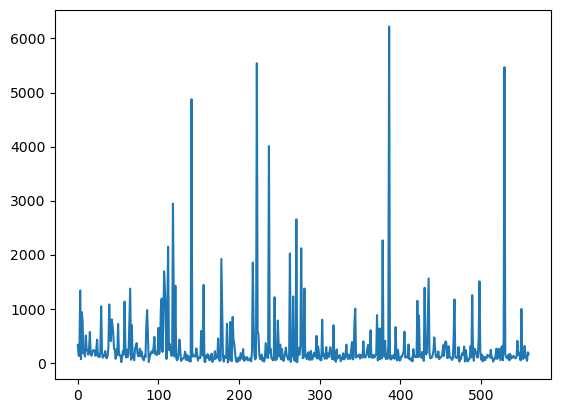

In [264]:
plt.plot(x, y)

## Model

In [272]:
# x = x.reshape(-1, 1)
# y = y.reshape(-1, 1)
model = svm.SVR().fit(x, y)
model.score(x, y)

/home/iliyan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.08536130790565033

In [290]:
print(model.predict(np.array([[300]])))

[118.34979139]


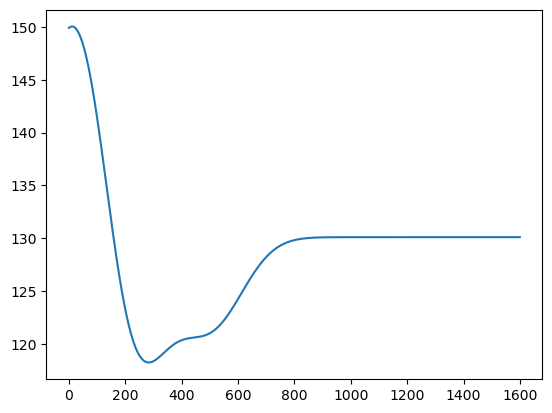

In [275]:
days_n = 1600
xs = np.array([x for x in range(0,days_n)])
ys = np.array([model.predict(np.array([[x]])) for x in range(0, days_n)]).flatten()

plt.plot(xs,ys)